In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

Data cleaning

In [2]:
df=pd.read_csv('Mahmoud Mohamed Elsaied Mohamed Elmetwally - heart_disease_uci.csv')

In [3]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [5]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [6]:
df.drop(columns='id',inplace=True)

In [7]:
df.head()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [8]:
df.isnull().sum()

age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [9]:
df['target']=df['num'].apply(lambda x:1 if x>0 else 0)

In [10]:
df.drop(columns='num',inplace=True)

In [11]:
df.head()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,target
0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,1
2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [12]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

In [13]:
cat_cols = df.select_dtypes(include=['object', 'bool']).columns
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [14]:
df

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,target
0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,1
2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,flat,0.0,normal,1
916,62,Male,VA Long Beach,typical angina,130.0,139.0,False,st-t abnormality,140.0,False,0.5,flat,0.0,normal,0
917,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,flat,0.0,fixed defect,1
918,58,Male,VA Long Beach,asymptomatic,130.0,385.0,True,lv hypertrophy,140.0,False,0.5,flat,0.0,normal,0


In [15]:
df.replace({True: 1, False: 0}, inplace=True)

In [16]:
df = pd.get_dummies(df, drop_first=True)

In [17]:
df.head()

,age,trestbps,chol,fbs,thalch,exang,oldpeak,ca,target,sex_Male,...,dataset_VA Long Beach,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_normal,restecg_st-t abnormality,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,63,145.0,233.0,1,150.0,0,2.3,0.0,0,True,...,False,False,False,True,False,False,False,False,False,False
1,67,160.0,286.0,0,108.0,1,1.5,3.0,1,True,...,False,False,False,False,False,False,True,False,True,False
2,67,120.0,229.0,0,129.0,1,2.6,2.0,1,True,...,False,False,False,False,False,False,True,False,False,True
3,37,130.0,250.0,0,187.0,0,3.5,0.0,0,True,...,False,False,True,False,True,False,False,False,True,False
4,41,130.0,204.0,0,172.0,0,1.4,0.0,0,False,...,False,True,False,False,False,False,False,True,True,False


In [18]:
df.shape

(920, 22)

In [19]:
df.isnull().sum()

age                         0
trestbps                    0
chol                        0
fbs                         0
thalch                      0
exang                       0
oldpeak                     0
ca                          0
target                      0
sex_Male                    0
dataset_Hungary             0
dataset_Switzerland         0
dataset_VA Long Beach       0
cp_atypical angina          0
cp_non-anginal              0
cp_typical angina           0
restecg_normal              0
restecg_st-t abnormality    0
slope_flat                  0
slope_upsloping             0
thal_normal                 0
thal_reversable defect      0
dtype: int64

In [20]:
df.dtypes

age                           int64
trestbps                    float64
chol                        float64
fbs                           int64
thalch                      float64
exang                         int64
oldpeak                     float64
ca                          float64
target                        int64
sex_Male                       bool
dataset_Hungary                bool
dataset_Switzerland            bool
dataset_VA Long Beach          bool
cp_atypical angina             bool
cp_non-anginal                 bool
cp_typical angina              bool
restecg_normal                 bool
restecg_st-t abnormality       bool
slope_flat                     bool
slope_upsloping                bool
thal_normal                    bool
thal_reversable defect         bool
dtype: object

In [21]:
df.replace({True: 1, False: 0}, inplace=True)

In [22]:
df.dtypes

age                           int64
trestbps                    float64
chol                        float64
fbs                           int64
thalch                      float64
exang                         int64
oldpeak                     float64
ca                          float64
target                        int64
sex_Male                      int64
dataset_Hungary               int64
dataset_Switzerland           int64
dataset_VA Long Beach         int64
cp_atypical angina            int64
cp_non-anginal                int64
cp_typical angina             int64
restecg_normal                int64
restecg_st-t abnormality      int64
slope_flat                    int64
slope_upsloping               int64
thal_normal                   int64
thal_reversable defect        int64
dtype: object

In [23]:
df.head()

,age,trestbps,chol,fbs,thalch,exang,oldpeak,ca,target,sex_Male,...,dataset_VA Long Beach,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_normal,restecg_st-t abnormality,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,63,145.0,233.0,1,150.0,0,2.3,0.0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,67,160.0,286.0,0,108.0,1,1.5,3.0,1,1,...,0,0,0,0,0,0,1,0,1,0
2,67,120.0,229.0,0,129.0,1,2.6,2.0,1,1,...,0,0,0,0,0,0,1,0,0,1
3,37,130.0,250.0,0,187.0,0,3.5,0.0,0,1,...,0,0,1,0,1,0,0,0,1,0
4,41,130.0,204.0,0,172.0,0,1.4,0.0,0,0,...,0,1,0,0,0,0,0,1,1,0


In [24]:
corr=df.corr().sort_values('target',ascending=False)
corr['target']

target                      1.000000
exang                       0.433605
oldpeak                     0.366138
sex_Male                    0.307284
dataset_Switzerland         0.301614
age                         0.282700
thal_reversable defect      0.257029
dataset_VA Long Beach       0.203267
ca                          0.164755
fbs                         0.108071
restecg_st-t abnormality    0.104750
trestbps                    0.101273
slope_flat                  0.097259
cp_typical angina          -0.054673
restecg_normal             -0.093554
slope_upsloping            -0.180903
cp_non-anginal             -0.209812
chol                       -0.228976
dataset_Hungary            -0.263297
thal_normal                -0.286196
thalch                     -0.381864
cp_atypical angina         -0.403465
Name: target, dtype: float64

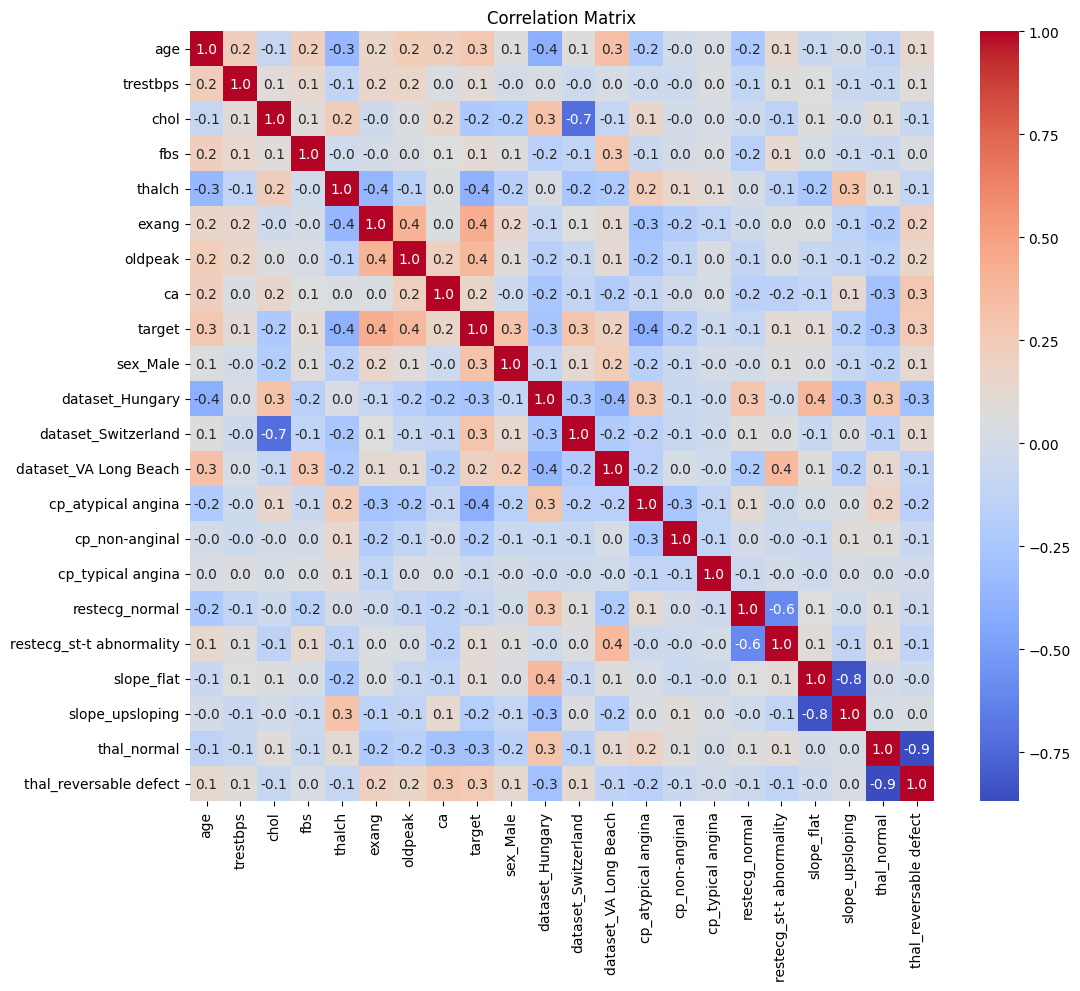

In [25]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Correlation Matrix')
plt.show()

In [26]:
df.drop(columns=['dataset_Switzerland','dataset_Hungary','dataset_VA Long Beach'],inplace=True)

In [27]:
corr=df.corr().sort_values('target',ascending=False)
corr['target']

target                      1.000000
exang                       0.433605
oldpeak                     0.366138
sex_Male                    0.307284
age                         0.282700
thal_reversable defect      0.257029
ca                          0.164755
fbs                         0.108071
restecg_st-t abnormality    0.104750
trestbps                    0.101273
slope_flat                  0.097259
cp_typical angina          -0.054673
restecg_normal             -0.093554
slope_upsloping            -0.180903
cp_non-anginal             -0.209812
chol                       -0.228976
thal_normal                -0.286196
thalch                     -0.381864
cp_atypical angina         -0.403465
Name: target, dtype: float64

split data

In [28]:
X=df.drop(columns='target')
y=df['target']

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42,shuffle=True)

model training and evaluating

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [31]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_predrf=rf.predict(X_test)

print(accuracy_score(y_test,y_predrf))
print(classification_report(y_test,y_predrf))
print(confusion_matrix(y_test,y_predrf))

0.8641304347826086
              precision    recall  f1-score   support

           0       0.83      0.84      0.83        75
           1       0.89      0.88      0.88       109

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184

[[63 12]
 [13 96]]


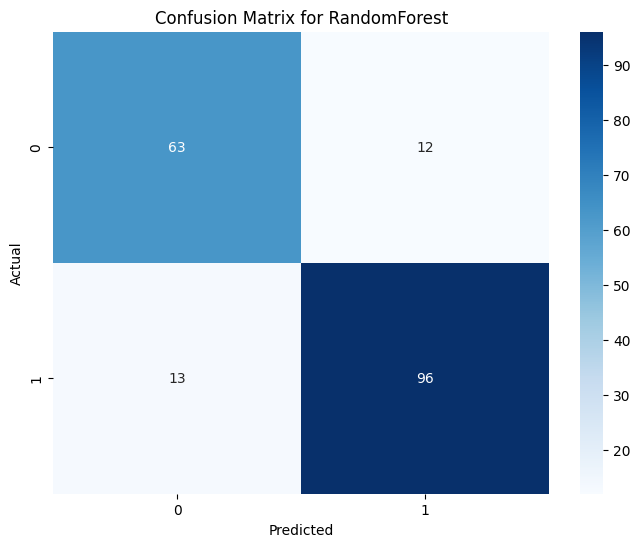

In [32]:
cm = confusion_matrix(y_test, y_predrf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for RandomForest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [33]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_preddt=dt.predict(X_test)

print(accuracy_score(y_test,y_preddt))
print(classification_report(y_test,y_preddt))
print(confusion_matrix(y_test,y_preddt))

0.782608695652174
              precision    recall  f1-score   support

           0       0.71      0.80      0.75        75
           1       0.85      0.77      0.81       109

    accuracy                           0.78       184
   macro avg       0.78      0.79      0.78       184
weighted avg       0.79      0.78      0.78       184

[[60 15]
 [25 84]]


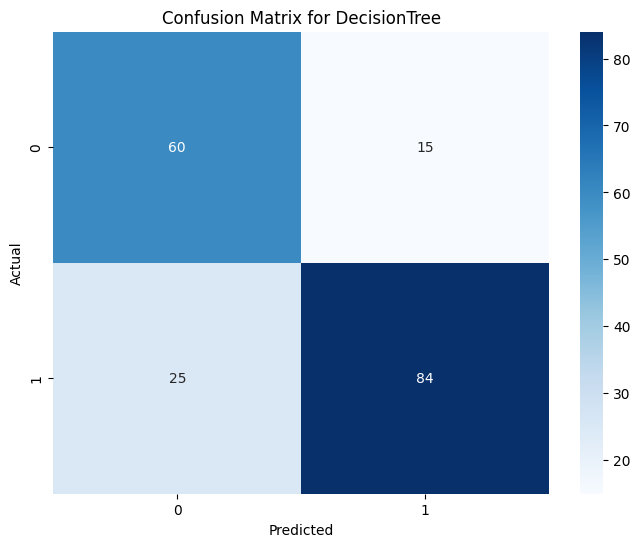

In [34]:
cm = confusion_matrix(y_test, y_preddt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for DecisionTree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [35]:
xg = XGBClassifier()
xg.fit(X_train, y_train)
y_predxg = xg.predict(X_test)

print(accuracy_score(y_test, y_predxg))
print(classification_report(y_test, y_predxg))
print(confusion_matrix(y_test, y_predxg))


0.875
              precision    recall  f1-score   support

           0       0.82      0.88      0.85        75
           1       0.91      0.87      0.89       109

    accuracy                           0.88       184
   macro avg       0.87      0.88      0.87       184
weighted avg       0.88      0.88      0.88       184

[[66  9]
 [14 95]]


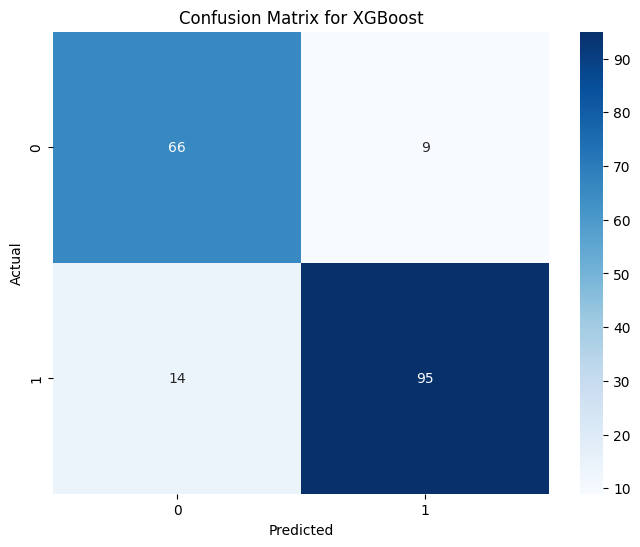

In [36]:
cm = confusion_matrix(y_test, y_predxg)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for XGBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [37]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [38]:
y_pred_log = log_reg.predict(X_test)

In [39]:
print("🔹 Logistic Regression Results 🔹")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_log))

🔹 Logistic Regression Results 🔹
Accuracy: 0.7989130434782609

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.80      0.76        75
           1       0.85      0.80      0.82       109

    accuracy                           0.80       184
   macro avg       0.79      0.80      0.79       184
weighted avg       0.80      0.80      0.80       184


Confusion Matrix:
 [[60 15]
 [22 87]]


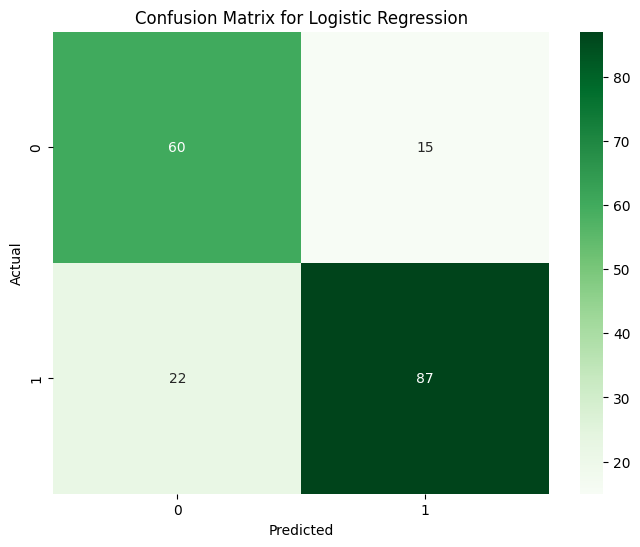

In [40]:
cm = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [43]:
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

In [44]:
y_pred_logs = log_reg.predict(X_test_scaled)

In [45]:
print("Accuracy:", accuracy_score(y_test, y_pred_logs))
print("\nClassification Report:\n", classification_report(y_test, y_pred_logs))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_logs))

Accuracy: 0.7989130434782609

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.80      0.76        75
           1       0.85      0.80      0.82       109

    accuracy                           0.80       184
   macro avg       0.79      0.80      0.79       184
weighted avg       0.80      0.80      0.80       184


Confusion Matrix:
 [[60 15]
 [22 87]]


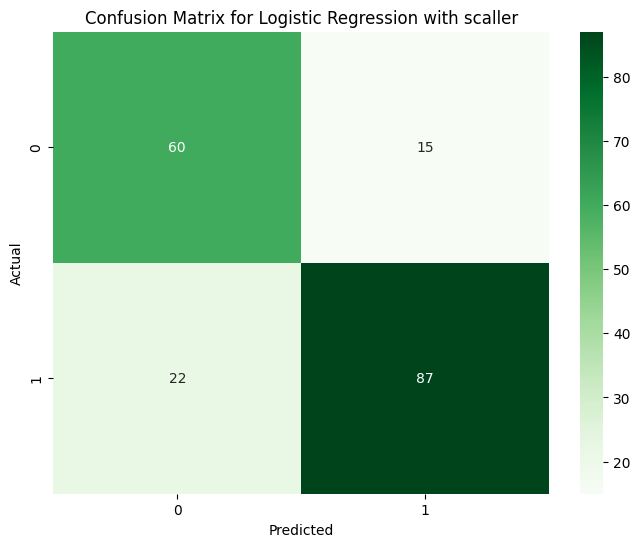

In [46]:
cm = confusion_matrix(y_test, y_pred_logs)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix for Logistic Regression with scaller')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [47]:
import joblib

joblib.dump(rf, 'model_random_forest.pkl')
joblib.dump(dt, 'model_decision_tree.pkl')
joblib.dump(xg, 'model_xgboost.pkl')
joblib.dump(log_reg, 'model_logistic_regression.pkl')

print("✅ All models saved successfully!")

✅ All models saved successfully!
